In [2]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

sys.path.append('..')

In [3]:
class MyException(Exception):  # 继承异常类

    def __init__(self, reason):
        self.reason = reason

In [9]:
def data_plot(vis_type, path='res\confuse_matrix', method_=None):
    try:
        if os.path.exists(path):
            files = os.listdir(path)
        else:
            raise MyException('不存在该路径{}，请检查！'.format(path))
    except MyException as e:
        print(e)

    #read and visiualize data
    res = []
    model_name = []
    df = pd.DataFrame()
    for type in vis_type:
        temp = []
        for file_name in files:
            if file_name.replace('.json', '') not in model_name:
                model_name.append(file_name.replace('.json', ''))
            with open(os.path.join(path, file_name), 'r') as f:
                cont = json.load(f)
                temp.append(cont[type])
            f.close()
        res.append(temp)
    
    if not method_:
        for i in range(len(vis_type)):
            df_temp = pd.DataFrame({
                'res': res[i],
                'model': model_name,
                'criterion': [vis_type[i]] * len(model_name)
            })
            df = pd.concat([df, df_temp], axis=0)
        sns.set_palette('Set1')  #设置绘图的颜色主题
        sns.set_style('darkgrid')  #设置绘图的图表风格
        #设置元素的缩放比例，调整图表元素的大小
        sns.set_context(
            rc={
                'axes.labelsize': 15,
                'legend.fontsize': 13,
                'xtick.labelsize': 13,
                'ytick.labelsize': 13
            })
        #设置图表的大小与分辨率
        fig = plt.figure(figsize=(6, 5), dpi=100)
        #使用sns.lineplot()函数绘制多数据系列的带标记的曲线图
        sns.scatterplot(x='model',
                        y='res',
                        hue='criterion',
                        style='criterion',
                        data=df,
                        markers=True)
        # 若用参数dashes=False,表示均为实线
        plt.show()
        plt.savefig(vis_type+'.png')

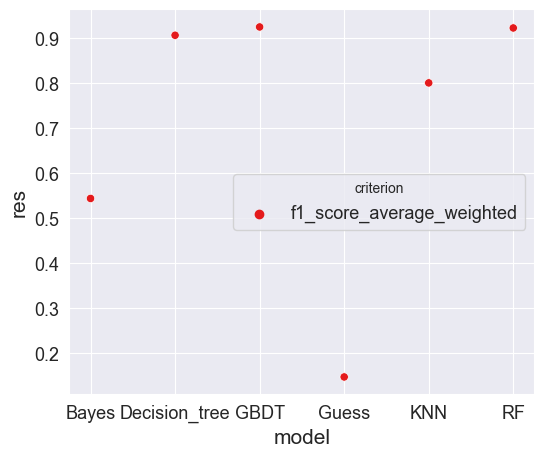

In [19]:
data_plot(vis_type=[
    "f1_score_average_weighted"
])
# "accuracy","precision_score_average_None","precision_score_average_micro",
# "precision_score_average_macro","precision_score_average_weighted",
# "recall_score_average_None","recall_score_average_micro",
# "recall_score_average_macro","recall_score_average_weighted",
# "f1_score_average_None","f1_score_average_micro",
# "f1_score_average_macro","f1_score_average_weighted"